In [1]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load training data
trainset = datasets.FashionMNIST('FashionMNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('FashionMNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

 99%|█████████▉| 26181632/26421880 [00:21<00:00, 1359306.52it/s]

Extracting FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/FashionMNIST/raw



0it [00:00, ?it/s]


  0%|          | 0/29515 [00:00<?, ?it/s]
32768it [00:00, 57069.51it/s]                           

0it [00:00, ?it/s]

Extracting FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/FashionMNIST/raw



 93%|█████████▎| 4112384/4422102 [00:04<00:00, 1174872.95it/s]
4423680it [00:04, 908930.43it/s]                              

0it [00:00, ?it/s]

Extracting FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/FashionMNIST/raw



8192it [00:00, 22289.04it/s]            

Extracting FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/FashionMNIST/raw
Processing...
Done!



26427392it [00:40, 1359306.52it/s]                              

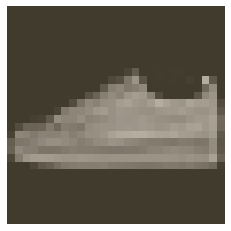

In [5]:
import helper
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [11]:
# Build network model
from torch import nn
from torch import optim
import torch.nn.functional as F

model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten FashionMNIST images into a 784 long vector
        images = images.view(images.shape[0],-1)
        # Reset past gradients
        optimizer.zero_grad()
        # feed forward
        output = model.forward(images)
        # get loss
        loss = criterion(output, labels)
        # backword propagation
        loss.backward()
        # update weights
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 2.16055723726114
Training loss: 1.2984613841022257
Training loss: 0.8577378961577344
Training loss: 0.7165661313767626
Training loss: 0.6449566468882408


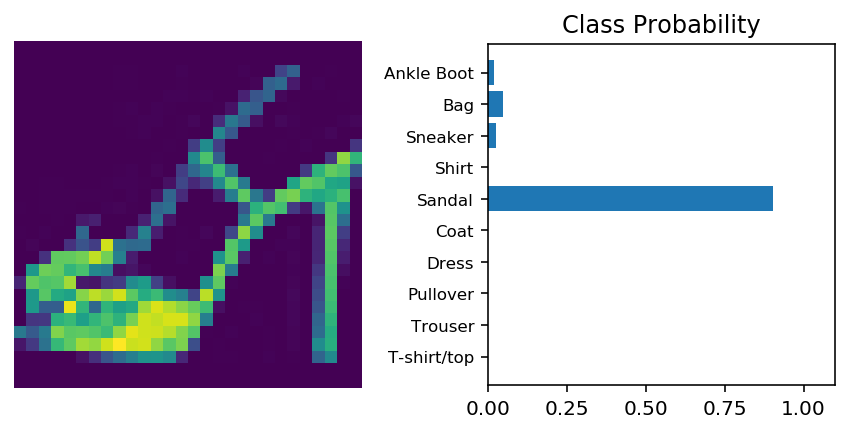

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Test my network
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to ID vector
img = img.resize_(1, 784)

# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Calculate the class probabilities softmax for the image
ps = F.softmax(logits, dim=1)
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')